<a href="https://colab.research.google.com/github/winstonlingga/QM2Gr13/blob/main/Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Impact of Oil Dependency on the Socio-Economic Development of Major Oil Exporters**



In [30]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

1. Download Necessary Libraries and Upload Database Into a Data file
2. Use appropriate Data Imputation Techniques to Fill in Missing Data


In [31]:
!mkdir data
!mkdir data/grproject

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/grproject’: File exists


In [32]:
from google.colab import files
uploaded = files.upload()

Saving Country Data 2 - COUNTRY DATA.csv to Country Data 2 - COUNTRY DATA.csv


In [33]:
df = pd.read_csv('Country Data 2 - COUNTRY DATA.csv', skiprows = 2)

df.columns = ['Country', 'Year', 'GDP_per_Capita', 'Oil_Rent',
              'Debt_to_GDP_Ratio', 'HDI', 'Democracy_Index',
              'Civil_Rights_Freedom_Indexes', 'Gini_Coefficient']

In [34]:
# Convert 'Year' to integer and other numerical columns to float
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric, making non-numeric values NaN
df.dropna(subset=['Year'], inplace=True)  # Drop rows where 'Year' is NaN
df['Year'] = df['Year'].astype(int)
df['GDP_per_Capita'] = pd.to_numeric(df['GDP_per_Capita'], errors='coerce')
df['Oil_Rent'] = pd.to_numeric(df['Oil_Rent'], errors='coerce')
df['Debt_to_GDP_Ratio'] = pd.to_numeric(df['Debt_to_GDP_Ratio'], errors='coerce')
df['HDI'] = pd.to_numeric(df['HDI'], errors='coerce')
df['Gini_Coefficient'] = pd.to_numeric(df['Gini_Coefficient'], errors='coerce')

# Drop completely empty rows if any
df.dropna(how='all', inplace=True)

In [35]:
#Data Imputation
df['Gini_Coefficient'] = df['Gini_Coefficient'].interpolate(method='linear')
# Replace missing values with the mean or median of the column
df['GDP_per_Capita'].fillna(df['GDP_per_Capita'].mean(), inplace=True)
df['Oil_Rent'].fillna(df['Oil_Rent'].mean(), inplace=True)
df['Debt_to_GDP_Ratio'].fillna(df['Debt_to_GDP_Ratio'].median(), inplace=True)

In [36]:
# Replace missing values with the mode (most frequent value)
# Assuming these are categorical or ordinal and have a common frequent value
df['Democracy_Index'].fillna(df['Democracy_Index'].mode()[0], inplace=True)
df['Civil_Rights_Freedom_Indexes'].fillna(df['Civil_Rights_Freedom_Indexes'].mode()[0], inplace=True)


In [37]:
# Verify the changes
print(df.head())
print(df.isnull().sum())

        Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0  Saudi Arabia  2000      8795.26060  41.669171               87.2  0.737   
1  Saudi Arabia  2001      8337.32272  33.352663               93.7  0.744   
2  Saudi Arabia  2002      8380.95930  31.342448               96.9  0.750   
3  Saudi Arabia  2003      9321.80387  37.034522               82.0  0.760   
4  Saudi Arabia  2004     10935.01660  42.640930               65.0  0.770   

  Democracy_Index Civil_Rights_Freedom_Indexes  Gini_Coefficient  
0           09.08                         8.85               NaN  
1           09.08                         8.85               NaN  
2           09.08                         8.85               NaN  
3           09.08                         8.85               NaN  
4           09.08                         8.85               NaN  
Country                          0
Year                             0
GDP_per_Capita                   0
Oil_Rent                

In [38]:
print(df)

          Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0    Saudi Arabia  2000      8795.26060  41.669171               87.2  0.737   
1    Saudi Arabia  2001      8337.32272  33.352663               93.7  0.744   
2    Saudi Arabia  2002      8380.95930  31.342448               96.9  0.750   
3    Saudi Arabia  2003      9321.80387  37.034522               82.0  0.760   
4    Saudi Arabia  2004     10935.01660  42.640930               65.0  0.770   
..            ...   ...             ...        ...                ...    ...   
126           UAE  2016     41054.53960  11.080756               19.4  0.870   
127           UAE  2017     43063.96750  13.498573               21.6  0.897   
128           UAE  2018     46722.26870  17.098994               20.9  0.909   
129           UAE  2019     45376.17080  15.681591               27.3  0.920   
130           UAE  2020     37629.17420  10.494098               36.9  0.912   

    Democracy_Index Civil_Rights_Freedo

As seen on the graph, the Gini Coefficienct for Saudi Arabia can not be interpolated as there is only one data point of reference, 2019. Thus this is a weakness.

In [39]:
#Data Cleaning
df = df.replace(r'^\s*$', np.nan, regex=True) #replace the empty string or strings composed with whitespace charater np.nan
numeric_c = [col for col in df.columns if col != 'Country' and col != 'Year']
df[numeric_c] = df[numeric_c].apply(pd.to_numeric, errors='coerce') # change to numeric
df[numeric_c] = df[numeric_c].replace(' ', 'NaN', regex=True)

In [40]:
print(df)

          Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0    Saudi Arabia  2000      8795.26060  41.669171               87.2  0.737   
1    Saudi Arabia  2001      8337.32272  33.352663               93.7  0.744   
2    Saudi Arabia  2002      8380.95930  31.342448               96.9  0.750   
3    Saudi Arabia  2003      9321.80387  37.034522               82.0  0.760   
4    Saudi Arabia  2004     10935.01660  42.640930               65.0  0.770   
..            ...   ...             ...        ...                ...    ...   
126           UAE  2016     41054.53960  11.080756               19.4  0.870   
127           UAE  2017     43063.96750  13.498573               21.6  0.897   
128           UAE  2018     46722.26870  17.098994               20.9  0.909   
129           UAE  2019     45376.17080  15.681591               27.3  0.920   
130           UAE  2020     37629.17420  10.494098               36.9  0.912   

     Democracy_Index  Civil_Rights_Free

**Exploratory Data Analysis (EDA)**:
To find relations between the variables in this data frame, we are going to conduct exploratory data analysis using boxplots and histograms for numerical data, scatter plots for categorical data, and line plots to visualise how data changes over time.

In [41]:
sns.set()

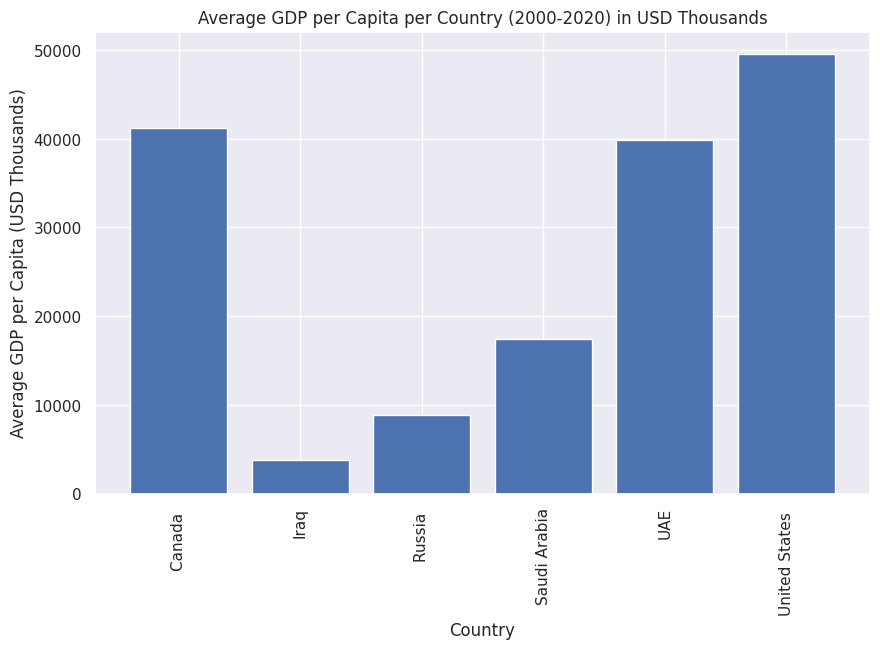

In [42]:
# Histogram
country_gdp = df.groupby('Country')['GDP_per_Capita'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(country_gdp['Country'], country_gdp['GDP_per_Capita'])
plt.title('Average GDP per Capita per Country (2000-2020) in USD Thousands')
plt.xlabel('Country')
plt.ylabel('Average GDP per Capita (USD Thousands)')
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.show()



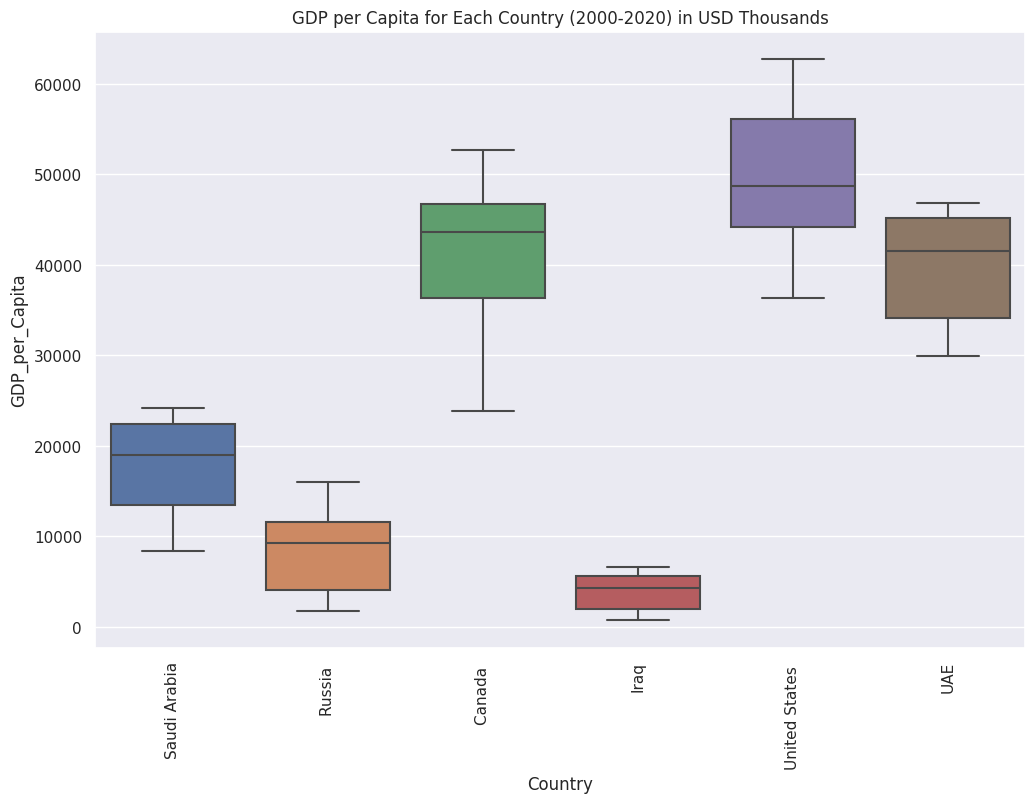

In [43]:
# Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x='Country', y='GDP_per_Capita', data=df)
plt.title('GDP per Capita for Each Country (2000-2020) in USD Thousands')
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.show()

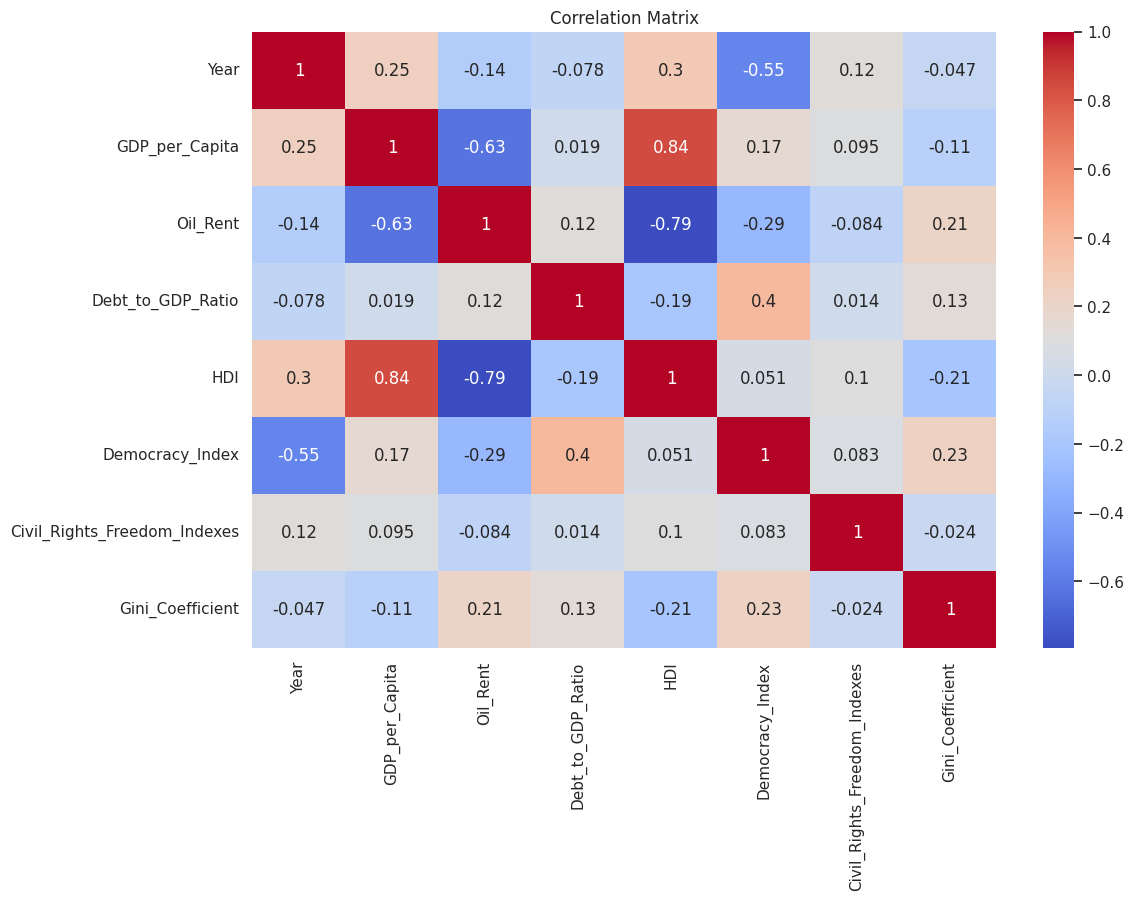

In [47]:
# Correlation matrix to understand how variables relate to each other
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

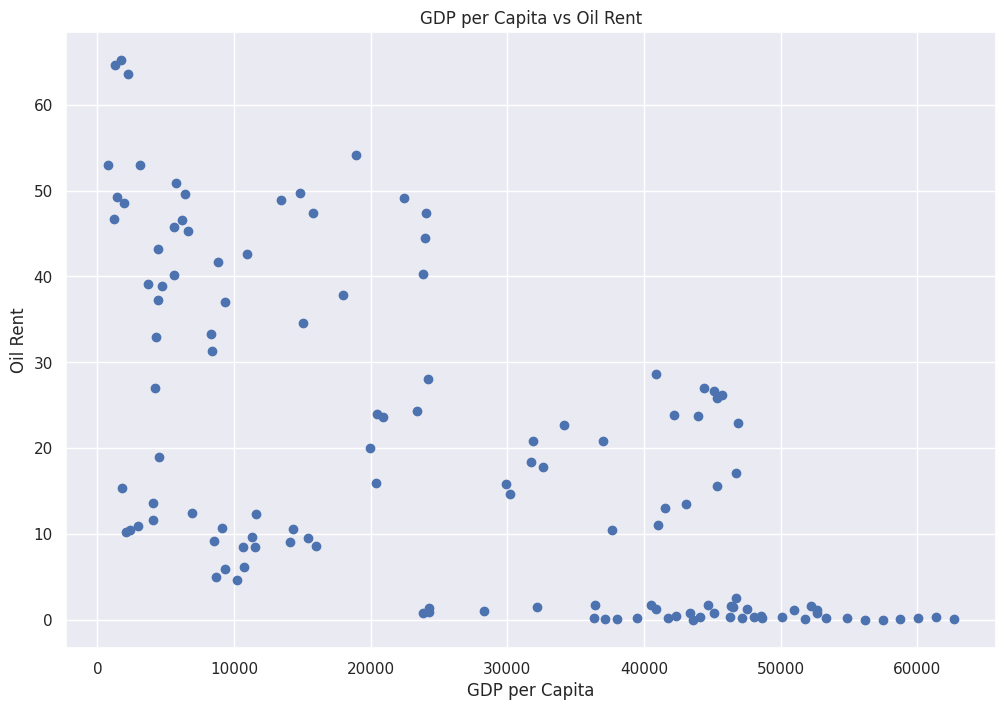

In [48]:
# Scatter plot to examine relationship between numerical variables
plt.scatter(df['GDP_per_Capita'], df['Oil_Rent'])
plt.title('GDP per Capita vs Oil Rent')
plt.xlabel('GDP per Capita')
plt.ylabel('Oil Rent')
plt.show()

In [18]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.7 MB/s eta 0:00:00


In [ ]:
#Panel Regression
import pandas as pd
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare

df=df.set_index(['Country','Year']) # set the index to the county fips code and the year
model = PanelOLS.from_formula('GDP_per_Capita ~ 1 + Oil_Rent + Debt_to_GDP_Ratio + HDI + EntityEffects', data=df).fit()
#set GDP/Capita as dependent variable and Oil Rent, Debt to GDP Ratio and HDI as independent variable
print(compare({'Fixed Effects': model,}, stars=True))


             Model Comparison             
                             Fixed Effects
------------------------------------------
Dep. Variable               GDP_per_Capita
Estimator                         PanelOLS
No. Observations                       126
Cov. Est.                       Unadjusted
R-squared                           0.4440
R-Squared (Within)                  0.4440
R-Squared (Between)                 0.5696
R-Squared (Overall)                 0.5540
F-statistic                         31.147
P-value (F-stat)                    0.0000
=====================     ================
Intercept                    -7.903e+04***
                                 (-6.9493)
Oil_Rent                         234.75***
                                  (3.8114)
Debt_to_GDP_Ratio                  -17.109
                                 (-1.5354)
HDI                            1.19e+05***
                                  (9.0775)
======================= ==================
Effects    